# Credit Card Fraud Detection

Importing Dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

In [3]:
creditcarddata = pd.read_csv('C:/Users/mohit/OneDrive/Desktop/Northeastern/ALY 6110 Big data/Week 3/raghu543-credit-card-fraud-data/data/creditcard.csv')

In [4]:
creditcarddata.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,False
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,False
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,False
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,False
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,False


In [6]:
creditcarddata.tail()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,False
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,False
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,False
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,False
284806,172792,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,False


In [7]:
creditcarddata.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [8]:
pd.set_option('precision',3)
creditcarddata.loc[:, ['time', 'amount']].describe()

,time,amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


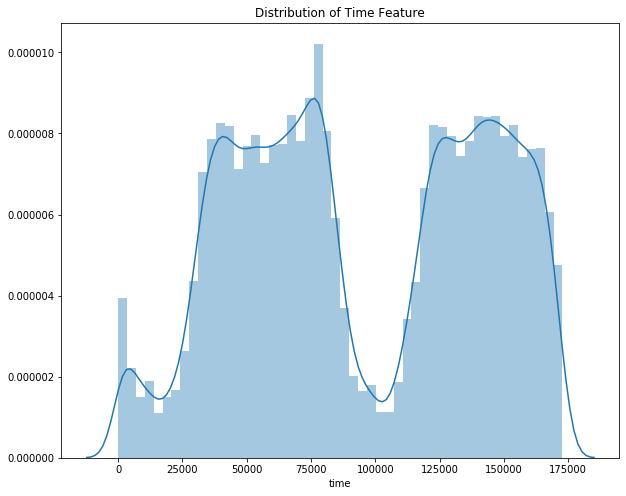

In [9]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(creditcarddata.time)

In [10]:
creditcarddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
time      284807 non-null int64
v1        284807 non-null float64
v2        284807 non-null float64
v3        284807 non-null float64
v4        284807 non-null float64
v5        284807 non-null float64
v6        284807 non-null float64
v7        284807 non-null float64
v8        284807 non-null float64
v9        284807 non-null float64
v10       284807 non-null float64
v11       284807 non-null float64
v12       284807 non-null float64
v13       284807 non-null float64
v14       284807 non-null float64
v15       284807 non-null float64
v16       284807 non-null float64
v17       284807 non-null float64
v18       284807 non-null float64
v19       284807 non-null float64
v20       284807 non-null float64
v21       284807 non-null float64
v22       284807 non-null float64
v23       284807 non-null float64
v24       284807 non-null float64
v25       284807 non-null float64
v26    

In [11]:
creditcarddata.isnull().sum()

time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
amount    0
class     0
dtype: int64

In [12]:
creditcarddata.sample(5)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
117254,74603,-1.361,0.516,1.692,-1.408,0.078,-0.470,0.570,-0.048,0.313,...,-0.105,0.051,0.130,0.240,-0.439,0.685,0.005,-0.003,19.59,False
57466,47922,1.162,0.012,0.126,0.378,-0.273,-0.637,0.128,-0.030,-0.138,...,-0.461,-1.580,0.185,-0.053,0.034,-0.020,-0.071,0.009,49.99,False
182106,125259,0.048,1.489,-3.063,-0.575,2.373,0.433,0.793,0.681,-0.668,...,0.112,0.532,-0.088,-1.137,-0.392,0.649,0.158,0.027,0.76,False
79727,58149,1.163,-0.387,0.863,0.165,-0.897,-0.166,-0.567,-0.007,0.810,...,0.077,0.307,-0.150,-0.022,0.295,1.133,-0.040,0.021,59.00,False
13100,22991,-1.381,1.460,1.683,0.852,0.698,0.432,0.826,-0.307,1.719,...,-0.745,-1.119,-0.045,-0.925,0.240,-0.507,0.266,-0.187,18.00,False


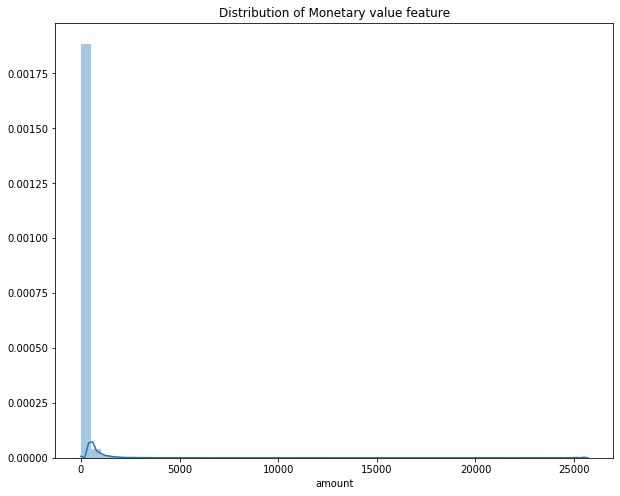

In [13]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary value feature')
sns.distplot(creditcarddata.amount)

Mean in the dataset =88 dollars
Biggest transaction a monetary value of around 25,691 dollars

# Fraud vs Normal Transactions 

In [14]:
counts = creditcarddata['class'].value_counts()
normal = counts[0]
fraudulent = counts[1]
form_norm = (normal/(normal+fraudulent))*100
form_fraud = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, form_norm, fraudulent, form_fraud))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


In [15]:
cre = creditcarddata.corr()
cre

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
v1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
v2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
v3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
v4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
v5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
v6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
v7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
v8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
v9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1, 'Correlation Heatmap')

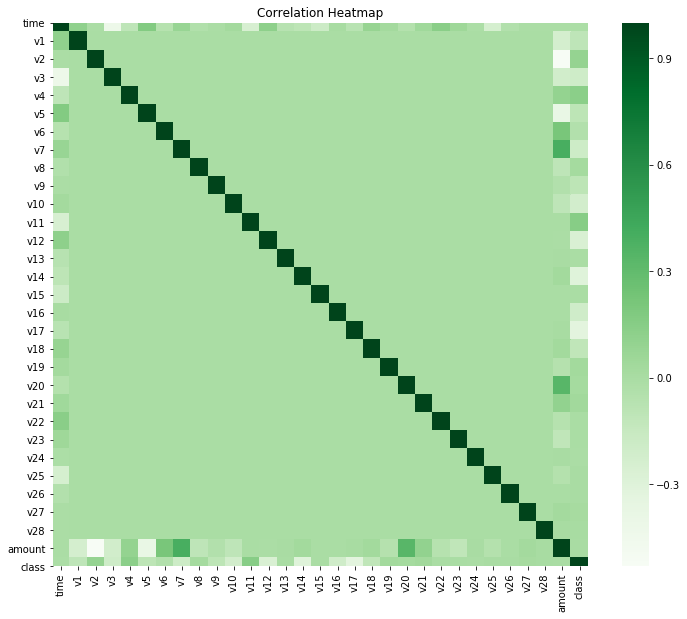

In [16]:
#heatmap
cre = creditcarddata.corr()
plt.figure(figsize=(12, 10))
mmap = sns.heatmap(data = cre, cmap = "Greens")
plt.title("Correlation Heatmap")

# Highest correlation comes from:
* Time & V3(-0.42)
* Amount & V2(-0.53)
* Amount & V4(0.4)


While these correlations are high, I don't expect it to run the risk of multicollinearity.

In [17]:
creditcarddata.replace(False, 0, inplace = True)
creditcarddata.replace(True, 1, inplace = True)

Text(0.5, 0, 'AMOUNT')

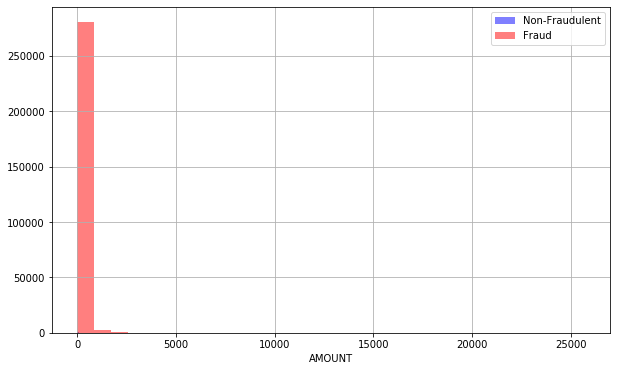

In [18]:
plt.figure(figsize=(10,6))
creditcarddata[creditcarddata['class']==1]['amount'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Non-Fraudulent')
creditcarddata[creditcarddata['class']==0]['amount'].hist(alpha=0.5,color='red',
                                              bins=30,label='Fraud')
plt.legend()
plt.xlabel('AMOUNT')

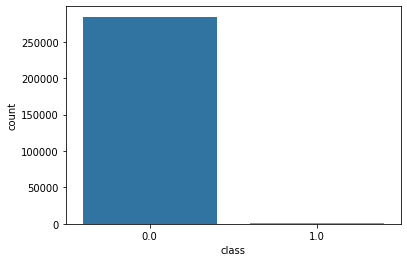

In [19]:
sns.countplot(x='class',data=creditcarddata)

# Skewness

In [20]:
skew_ = creditcarddata.skew()
skew_

time      -0.036
v1        -3.281
v2        -4.625
v3        -2.240
v4         0.676
v5        -2.426
v6         1.827
v7         2.554
v8        -8.522
v9         0.555
v10        1.187
v11        0.357
v12       -2.278
v13        0.065
v14       -1.995
v15       -0.308
v16       -1.101
v17       -3.845
v18       -0.260
v19        0.109
v20       -2.037
v21        3.593
v22       -0.213
v23       -5.875
v24       -0.552
v25       -0.416
v26        0.577
v27       -1.170
v28       11.192
amount    16.978
class     23.998
dtype: float64

# Scaling Amount and Time

* StandardScaler: It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in normal distribution. It is more useful in classification than regression.

* Standardscaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means divide all the values by the standard deviation.

* Normalizer: It squeezes the data between 0 and 1. It performs normalization. Due to the decreased range and magnitude, the gradients in the training process do not explode and you do not get higher values of loss. Is more useful in regression than classification.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#Scaling Time
scaled_time = scaler.fit_transform(creditcarddata[['time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [22]:
#Scaling Amount
scaled_amount = scaler2.fit_transform(creditcarddata[['amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

Concatenating newly converted columns with original data i.e.creditcarddata

In [23]:
creditcarddata = pd.concat([creditcarddata, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
creditcarddata.sample(5)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v23,v24,v25,v26,v27,v28,amount,class,scaled_amount,scaled_time
259186,159004,-0.415,0.012,1.356,1.107,0.813,-0.156,-0.373,0.031,-0.100,...,0.063,-0.681,-0.641,-0.160,0.238,0.204,5.95,0.0,-0.329,1.352
76354,56529,-0.600,0.736,0.991,0.750,0.195,-0.182,1.008,-0.007,-0.888,...,0.055,0.019,-0.113,-0.320,0.375,0.224,112.80,0.0,0.098,-0.806
168768,119375,-0.967,-0.414,3.198,-0.397,-0.850,1.258,-0.881,0.618,0.339,...,-0.340,0.698,0.660,-0.466,0.150,0.093,25.00,0.0,-0.253,0.517
253169,156118,-1.350,2.018,-1.123,-1.896,1.909,-0.733,2.346,-1.155,1.281,...,-0.385,0.319,-0.096,-0.107,-0.367,-0.772,0.76,0.0,-0.350,1.291
284012,172081,-0.704,-0.167,0.389,-3.161,-0.269,-1.196,1.078,-0.750,-1.667,...,-0.214,-0.156,-0.031,-0.431,0.316,-0.161,100.00,0.0,0.047,1.627


In [24]:
#dropping old amount and time columns
creditcarddata.drop(['amount', 'time'], axis=1, inplace=True)

# Train Test Split
Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set!

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = creditcarddata.drop('class', axis=1)
y = creditcarddata['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Training a decision Tree
Decision tree and their ensemble are popular methods for machine learning tasks of classification and regression. Decision trees are widely used since they are easy to interpret, handle, categorical features, extend to the multiclass classification setting, do not require feature scaling, and are able to capture non-linearities and feature interactions. Tree ensemble algorithms such as random forests and boosting are among the top performers for classification and regression tasks

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtree = DecisionTreeClassifier()

In [29]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [30]:
predictions = dtree.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85299
         1.0       0.73      0.76      0.75       144

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.86      0.88      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [33]:
print(confusion_matrix(y_test,predictions))

[[85258    41]
 [   34   110]]


# Training the Random Forest Model
Now its time to train RF!

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier(n_estimators=600)

In [36]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Prediction and Evaluations

In [37]:
predictions = rfc.predict(X_test)

**Now create a classification report from the results**

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85299
         1.0       0.93      0.80      0.86       144

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [40]:
print(confusion_matrix(y_test,predictions))

[[85291     8]
 [   29   115]]


**Dimensionality Reduction - 
It will less mislead the data means model accuracy increases, 
Less Dimensions means less computing, 
less data means that algorithms train faster, 
less data means less storage space required, 
less dimensions allow usage of algorithms unfit for a large number for dimensions, 
Removes redundant features and noise.**

In [ ]:
# from sklearn.manifold import TSNE

# X = creditcarddata.drop('class', axis=1)
# y = creditcarddata['class']

In [ ]:
# #t-sne
# X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

# Classification Algorithms

In [60]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [61]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [63]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (227845, 30) (56962, 30) 

Y_shapes:
 Y_train: Y_validation:
 (227845,) (56962,)


In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [67]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.977997 (0.010848)
LDA: 0.981207 (0.013527)
KNN: 0.919164 (0.027066)
CART: 0.882565 (0.021994)
SVM: 0.939202 (0.027348)
XGB: 0.980648 (0.016199)
RF: 0.927105 (0.022893)


# Comparison of algorithms

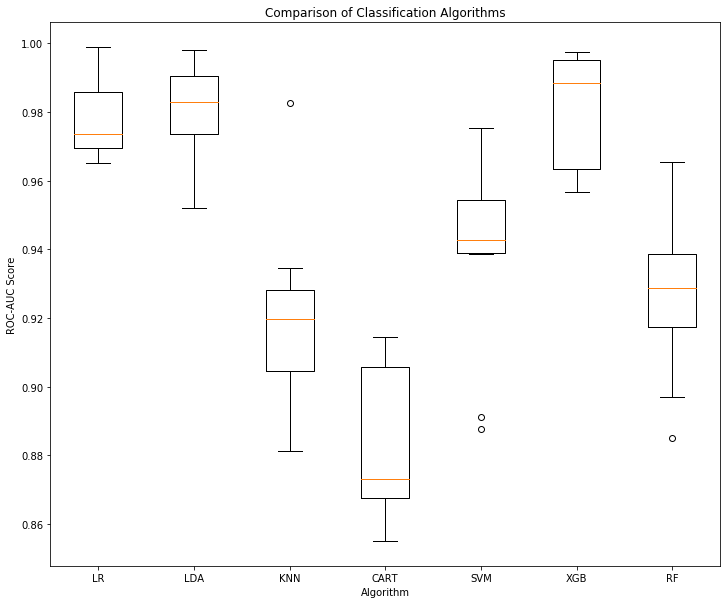

In [68]:
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

References - https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_novelty_detection.html#sphx-glr-auto-examples-neighbors-plot-lof-novelty-detection-py

https://towardsdatascience.com/dimensionality-reduction-for-machine-learning-80a46c2ebb7e

https://machinelearningmastery.com/why-you-should-be-spot-checking-algorithms-on-your-machine-learning-problems/

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

https://towardsdatascience.com/a-guide-to-decision-trees-for-machine-learning-and-data-science-fe2607241956

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62